# Problem statement:-

As we all know the importance of maintaining consistency in any industry is difficult. And every organisation maintains a certain method of reaching the public to know if the service provided by them is acceptable or not?

So, in the present generation, every company/Organisation holds a social media account. Now we will develop a sort of application which can help different industries to know the customer's interest, which is very important nowadays.

As a Data scientist, we will analyse the data available in YouTube to help our clients in different ways.

# Objective:-

YouTube has over 1 billion active users and it is the second largest search engine – nearly 95% of the global internet population are users.

People rely on its videos for reviews and comments before purchasing a product. So, YouTube is an indispensable resource for marketers to look for influencers.

Top influencers usually garner millions of views for each video. If product marketers partner with these influencers, it helps convince their loyal viewers to buy the product, recommend it to friends, and spread the word.

So it helps to increase the popularity of the product dramatically.

One of the reasons why review videos do so well is because people are curious about what to buy and whether it is worth their money and time.

Analytics makes it possible to understand and gauge the reactions and opinions of viewers and YouTube influencers within just a few minutes. By leveraging on NLP, we can perform video review and comment analysis to quickly learn the influencer’s and audience’s mindset about the product.

# Table of Contents

1. Importing Libraries


2. Importing Dataset


3. Exploratory Data Analysis (EDA)


4. Visualization

   4.1 Visualization between Likes and Reply Count
   
   4.2 Visualization between Likes and Time
   
   4.3 Visualization of the relation of parts of speech of the comment
   
   
5. Text Preprocessing

   5.1 Removing all irrelevant characters (Numbers and Punctuation)
   
   5.2 Converting all the characters into lowercase
   
   5.3 Tokenization
   
   5.4 Removing Stopwords
   
   5.5 Lemmatization
   
   5.6 Converting the list of tokens back into the string
   
    
6. The Sentiment Analysis


7. Classifying the comment on the basis of Sentiment scores


8. Wordcloud based on comments nature
    
    8.1 Wordcloud for Positive Comments
    
    8.2 Constructing a Wordcloud of Negative Comments
    
    8.3 Wordcloud of Neutral Comments
    

9. TF-IDF Vectorizer
   
   
10. Model Building

    10.1 Train and Test Split
    
    10.2 Multinomial Naive Bayes
    
    
11. Conclusion

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import spacy
from spacy import displacy

import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

## 2. Importing Dataset

1. In order to extract all the Youtube comments we have used selenium and beautiful soup packages of Python.


2. We have noted the video id for opening the particular video whose comments we want to extract to perform sentiment analysis.


3. For the extraction of Youtube comments, we wrote the codes in PyCharm and stored them in "Webscrap.py" file.


4. After running the code we successfully extracted the Youtube comment along with some other important information.


5. And then we noted the class names for user names, comments, likes, and reply counts and then stored that information in an Excel sheet with the name "YouTube_Comments".

In [2]:
data = pd.read_csv("YouTube_Comments.csv")
data

,Name,Comment,Time,Likes,Reply Count
0,Technical Guruji,"Jaldi se LIKE aur SHARE kardo <a href=""http://...",2021-12-03T09:18:21Z,1637,310
1,Bikash Jyoti,Wait boys it&#39;s just a back cover 😎,2022-09-27T07:37:04Z,0,0
2,Tech Puneet,"<a href=""https://youtu.be/8NkUfiM8rvI"">https:/...",2022-09-26T17:28:09Z,0,0
3,Debasish vlogs,4 sa 5 thar 🤣,2022-09-26T04:18:09Z,0,0
4,positive energy,Logo ko attract karte hai bas ye log ... Logi ...,2022-09-25T17:41:23Z,0,0
...,...,...,...,...,...
4020,R U S H I Ruchake,Egeg,2021-12-03T09:15:31Z,0,0
4021,Shahnawaz Tech,First,2021-12-03T09:15:30Z,1,0
4022,Harshal Nikam,1st,2021-12-03T09:15:29Z,1,0
4023,Godx,First,2021-12-03T09:15:29Z,0,0


Observations :-

The training data contains 4025 comments, and each entry contains 5 features.

1. Name - Name of the user who commented on this video.

 
2. Comment - Opinion of the user regarding the product or the video. The comment column is a very important feature in this dataset.


3. Time - This column features only the time stamp of that particular comment.


4. Likes - This column shows the number of likes on the particular comment.


5. Reply Count - It indicates the number of replies the particular comment gets.

## 3. Exploratory Data Analysis (EDA)

In [3]:
data.shape

(4025, 5)

Observations :- 

1. The data contains a total of 5 features for 1025 comments.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4025 entries, 0 to 4024
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         4023 non-null   object
 1   Comment      4025 non-null   object
 2   Time         4025 non-null   object
 3   Likes        4025 non-null   int64 
 4   Reply Count  4025 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 157.4+ KB


In [5]:
data.nunique()

Name           3554
Comment        3700
Time           3734
Likes            44
Reply Count      14
dtype: int64

In [6]:
data.isnull().sum()

Name           2
Comment        0
Time           0
Likes          0
Reply Count    0
dtype: int64

Observations :-

The 'Name' feature of the dataset had two null values, but instead of dropping them only, we will delete the entire column as it is not helpful for sentiment analysis.

In [7]:
data = data.drop(["Name"], axis=1)
data

,Comment,Time,Likes,Reply Count
0,"Jaldi se LIKE aur SHARE kardo <a href=""http://...",2021-12-03T09:18:21Z,1637,310
1,Wait boys it&#39;s just a back cover 😎,2022-09-27T07:37:04Z,0,0
2,"<a href=""https://youtu.be/8NkUfiM8rvI"">https:/...",2022-09-26T17:28:09Z,0,0
3,4 sa 5 thar 🤣,2022-09-26T04:18:09Z,0,0
4,Logo ko attract karte hai bas ye log ... Logi ...,2022-09-25T17:41:23Z,0,0
...,...,...,...,...
4020,Egeg,2021-12-03T09:15:31Z,0,0
4021,First,2021-12-03T09:15:30Z,1,0
4022,1st,2021-12-03T09:15:29Z,1,0
4023,First,2021-12-03T09:15:29Z,0,0


## 4. Visualization

### 4.1 Visualization between Likes and Reply Count

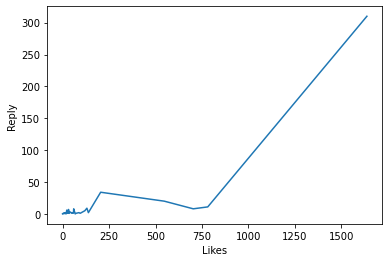

In [8]:
data = data.rename({'Reply Count' : 'Reply'}, axis=1)
data1 = data[["Likes", "Reply"]]

plot = sns.lineplot(data1.Likes, data1.Reply)

Observations :-

1. The comments which have most number of like also have the higher number of reply count.


2. We can say that number of replay count is directly proportional to the number of likes.

### 4.2 Visualization between Likes and Time

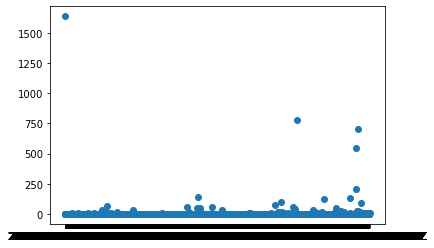

In [9]:
data2 = data[["Time", "Likes"]]
plot = plt.scatter(data2.Time, data2.Likes)

Observations :-

1. We can say that the time column is not directly proportional or does not have any influence on the number of likes.

### 4.3 Visualization of the relation of parts of speech of the comment

In [10]:
import spacy
from spacy import displacy
nlp=spacy.load('en_core_web_sm')

In [11]:
doc1=nlp(u'Cover is more expensive than phone')
options={'distance':110,'compact':'True', 'color':'white','bg':'#FF5733','font':'Times'}
displacy.render(doc1, style='dep',options=options)

## 5. Text Preprocessing

### 5.1 Removing all irrelevant characters (Numbers and Punctuation)

In [12]:
def clean_non_alphanumeric(review_text):
    return re.sub('[^a-zA-Z]',' ',review_text)

data['Comment'] = data['Comment'].apply(clean_non_alphanumeric)

data.head()

,Comment,Time,Likes,Reply
0,Jaldi se LIKE aur SHARE kardo a href http ...,2021-12-03T09:18:21Z,1637,310
1,Wait boys it s just a back cover,2022-09-27T07:37:04Z,0,0
2,a href https youtu be NkUfiM rvI https ...,2022-09-26T17:28:09Z,0,0
3,sa thar,2022-09-26T04:18:09Z,0,0
4,Logo ko attract karte hai bas ye log Logi ...,2022-09-25T17:41:23Z,0,0


### 5.2 Converting all the characters into lowercase

In [13]:
def clean_lowercase(review_text):
    return str(review_text).lower()
data['Comment'] = data['Comment'].apply(clean_lowercase)

data.head()

,Comment,Time,Likes,Reply
0,jaldi se like aur share kardo a href http ...,2021-12-03T09:18:21Z,1637,310
1,wait boys it s just a back cover,2022-09-27T07:37:04Z,0,0
2,a href https youtu be nkufim rvi https ...,2022-09-26T17:28:09Z,0,0
3,sa thar,2022-09-26T04:18:09Z,0,0
4,logo ko attract karte hai bas ye log logi ...,2022-09-25T17:41:23Z,0,0


### 5.3 Tokenization

In [14]:
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BASHAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
def clean_tokenization(review_text):
    return word_tokenize(review_text)
data['Comment'] = data['Comment'].apply(clean_tokenization)

data.head()

,Comment,Time,Likes,Reply
0,"[jaldi, se, like, aur, share, kardo, a, href, ...",2021-12-03T09:18:21Z,1637,310
1,"[wait, boys, it, s, just, a, back, cover]",2022-09-27T07:37:04Z,0,0
2,"[a, href, https, youtu, be, nkufim, rvi, https...",2022-09-26T17:28:09Z,0,0
3,"[sa, thar]",2022-09-26T04:18:09Z,0,0
4,"[logo, ko, attract, karte, hai, bas, ye, log, ...",2022-09-25T17:41:23Z,0,0


### 5.4 Removing Stopwords

In [17]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
stop_words = set(stopwords.words('english'))
def clean_stopwords(token):
    return [item for item in token if item not in stop_words]

data['Comment'] = data['Comment'].apply(clean_stopwords)

data.head(10)

,Comment,Time,Likes,Reply
0,"[jaldi, se, like, aur, share, kardo, href, htt...",2021-12-03T09:18:21Z,1637,310
1,"[wait, boys, back, cover]",2022-09-27T07:37:04Z,0,0
2,"[href, https, youtu, nkufim, rvi, https, youtu...",2022-09-26T17:28:09Z,0,0
3,"[sa, thar]",2022-09-26T04:18:09Z,0,0
4,"[logo, ko, attract, karte, hai, bas, ye, log, ...",2022-09-25T17:41:23Z,0,0
5,"[bhai, meko, ek, gift, krdo]",2022-09-25T13:49:42Z,0,0
6,"[fortuners, aajati, bhai]",2022-09-25T06:27:16Z,0,0
7,"[wow, shauk, badi, chiz, hai, bhai, richness, ...",2022-09-25T05:06:29Z,0,0
8,"[maiii, samaya, hun, br, br, thn, u, missed, t...",2022-09-25T02:14:33Z,0,0
9,[price],2022-09-24T19:09:40Z,0,1


### 5.5 Lemmatization

In [19]:
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

def clean_lemmatization(token):
    return [lemma.lemmatize(word=w, pos='v') for w in token]
data['Comment'] = data['Comment'].apply(clean_lemmatization)

In [20]:
def clean_length(token):
    return [i for i in token if len(i) > 2]
data['Comment'] = data['Comment'].apply(clean_length)

data.head(10)

,Comment,Time,Likes,Reply
0,"[jaldi, like, aur, share, kardo, href, http, w...",2021-12-03T09:18:21Z,1637,310
1,"[wait, boys, back, cover]",2022-09-27T07:37:04Z,0,0
2,"[href, https, youtu, nkufim, rvi, https, youtu...",2022-09-26T17:28:09Z,0,0
3,[thar],2022-09-26T04:18:09Z,0,0
4,"[logo, attract, karte, hai, bas, log, logi, di...",2022-09-25T17:41:23Z,0,0
5,"[bhai, meko, gift, krdo]",2022-09-25T13:49:42Z,0,0
6,"[fortuners, aajati, bhai]",2022-09-25T06:27:16Z,0,0
7,"[wow, shauk, badi, chiz, hai, bhai, richness, ...",2022-09-25T05:06:29Z,0,0
8,"[maiii, samaya, hun, thn, miss, tht, browww, m...",2022-09-25T02:14:33Z,0,0
9,[price],2022-09-24T19:09:40Z,0,1


### 5.6 Converting the list of tokens back into the string

In [21]:
def convert_to_string(listReview):
    return ' '.join(listReview)

data['Comment'] = data['Comment'].apply(convert_to_string)

data.head(10)

,Comment,Time,Likes,Reply
0,jaldi like aur share kardo href http www youtu...,2021-12-03T09:18:21Z,1637,310
1,wait boys back cover,2022-09-27T07:37:04Z,0,0
2,href https youtu nkufim rvi https youtu nkufim...,2022-09-26T17:28:09Z,0,0
3,thar,2022-09-26T04:18:09Z,0,0
4,logo attract karte hai bas log logi dikha kya ...,2022-09-25T17:41:23Z,0,0
5,bhai meko gift krdo,2022-09-25T13:49:42Z,0,0
6,fortuners aajati bhai,2022-09-25T06:27:16Z,0,0
7,wow shauk badi chiz hai bhai richness succesd ...,2022-09-25T05:06:29Z,0,0
8,maiii samaya hun thn miss tht browww mahabhara...,2022-09-25T02:14:33Z,0,0
9,price,2022-09-24T19:09:40Z,0,1


Observations :-


1. So here we have performed Text Preprocessing for the 'Comment' column of our Youtube comment dataset.


2. Initially, we removed all irrelevant characters, numbers and punctuation marks from the comments.


3. Then we converted all characters into the lowercase format and performed tokenization on the dataset.


4. After that, we checked for stopwords and then removed all the stopwords from the comments.


5. In the next process, we performed Lemmatization on the 'Comment' column of our Youtube comment dataset.


6. After converting data to lowercase and removing all the irrelevant characters and stopwords in order to perform sentiment analysis, we need to convert this list of tokens back into the string.

## 6. The Sentiment Analysis

In [22]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\BASHAR\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
data['Sentiment_scores'] = data['Comment'].apply(lambda x:sia.polarity_scores(x)['compound'])

data.head(10)

,Comment,Time,Likes,Reply,Sentiment_scores
0,jaldi like aur share kardo href http www youtu...,2021-12-03T09:18:21Z,1637,310,0.5719
1,wait boys back cover,2022-09-27T07:37:04Z,0,0,0.0000
2,href https youtu nkufim rvi https youtu nkufim...,2022-09-26T17:28:09Z,0,0,0.0000
3,thar,2022-09-26T04:18:09Z,0,0,0.0000
4,logo attract karte hai bas log logi dikha kya ...,2022-09-25T17:41:23Z,0,0,0.7579
5,bhai meko gift krdo,2022-09-25T13:49:42Z,0,0,0.4404
6,fortuners aajati bhai,2022-09-25T06:27:16Z,0,0,0.0000
7,wow shauk badi chiz hai bhai richness succesd ...,2022-09-25T05:06:29Z,0,0,0.9042
8,maiii samaya hun thn miss tht browww mahabhara...,2022-09-25T02:14:33Z,0,0,-0.1531
9,price,2022-09-24T19:09:40Z,0,1,0.0000


## 7. Classifying the comment on the basis of Sentiment scores

In [24]:
data['Sentiment'] = data['Sentiment_scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))
data.head(10)

,Comment,Time,Likes,Reply,Sentiment_scores,Sentiment
0,jaldi like aur share kardo href http www youtu...,2021-12-03T09:18:21Z,1637,310,0.5719,Positive
1,wait boys back cover,2022-09-27T07:37:04Z,0,0,0.0000,Neutral
2,href https youtu nkufim rvi https youtu nkufim...,2022-09-26T17:28:09Z,0,0,0.0000,Neutral
3,thar,2022-09-26T04:18:09Z,0,0,0.0000,Neutral
4,logo attract karte hai bas log logi dikha kya ...,2022-09-25T17:41:23Z,0,0,0.7579,Positive
5,bhai meko gift krdo,2022-09-25T13:49:42Z,0,0,0.4404,Positive
6,fortuners aajati bhai,2022-09-25T06:27:16Z,0,0,0.0000,Neutral
7,wow shauk badi chiz hai bhai richness succesd ...,2022-09-25T05:06:29Z,0,0,0.9042,Positive
8,maiii samaya hun thn miss tht browww mahabhara...,2022-09-25T02:14:33Z,0,0,-0.1531,Negative
9,price,2022-09-24T19:09:40Z,0,1,0.0000,Neutral


In [25]:
data.Sentiment.value_counts()

Neutral     2592
Positive    1238
Negative     195
Name: Sentiment, dtype: int64

## 8. Wordcloud based on comments nature

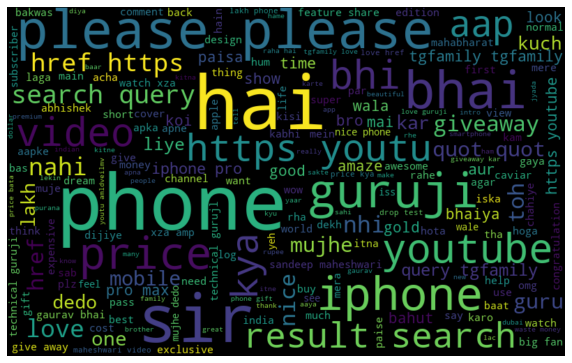

In [26]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in data['Comment']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### 8.1 Wordcloud for Positive Comments

In [27]:
all_words_posi = ' '.join([text for text in data['Comment'][data.Sentiment == 'Positive']])

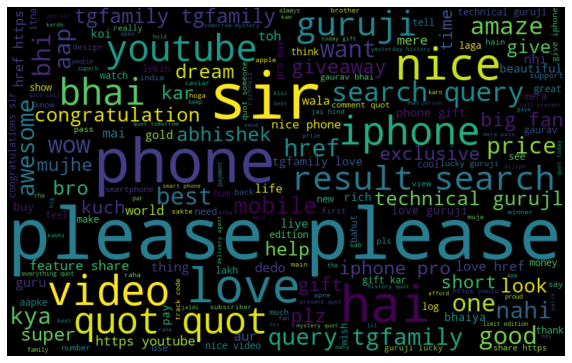

In [28]:
wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_posi)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_posi, interpolation="bilinear")
plt.axis('off')
plt.show()

### 8.2 Constructing a Wordcloud of Negative Comments

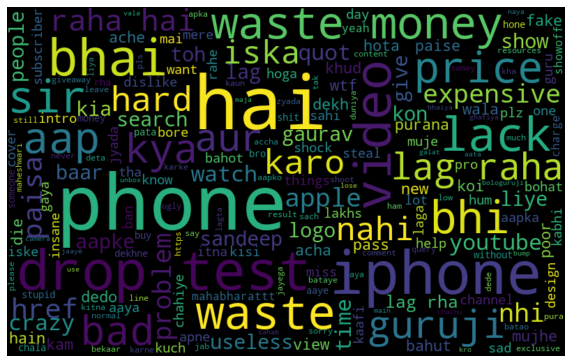

In [29]:
all_words_nega = ' '.join([text for text in data['Comment'][data.Sentiment == 'Negative']])

wordcloud_nega = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_nega)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_nega, interpolation="bilinear")
plt.axis('off')
plt.show()

### 8.3 Wordcloud of Neutral Comments

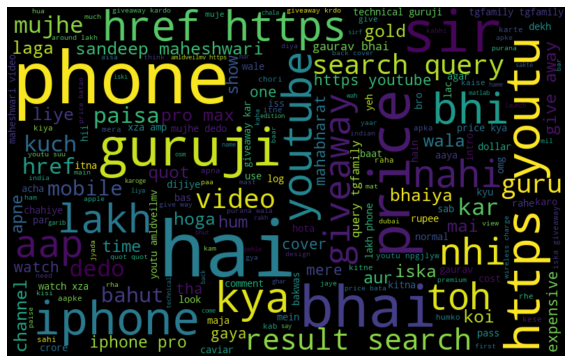

In [30]:
all_words_neutral = ' '.join([text for text in data['Comment'][data.Sentiment == 'Neutral']])

wordcloud_neutral = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neutral)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.axis('off')
plt.show()

## 9. TF-IDF Vectorizer

1. After performing text preprocessing and sentiment analysis. For the model building, we need to perform the TF-IDF Vectorizer method.


2. TF-IDF will transform the text into a meaningful representation of integers or numbers which is used to fit machine learning algorithms for predictions.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer().fit(data['Comment'])
cv.vocabulary_

{'jaldi': 1896,
 'like': 2449,
 'aur': 283,
 'share': 3559,
 'kardo': 2063,
 'href': 1723,
 'http': 1725,
 'www': 4179,
 'youtube': 4221,
 'com': 855,
 'result': 3344,
 'search': 3520,
 'query': 3245,
 'tgfamily': 3813,
 'wait': 4086,
 'boys': 636,
 'back': 325,
 'cover': 898,
 'https': 1726,
 'youtu': 4220,
 'nkufim': 2872,
 'rvi': 3409,
 'thar': 3825,
 'logo': 2480,
 'attract': 276,
 'karte': 2093,
 'hai': 1561,
 'bas': 414,
 'log': 2476,
 'logi': 2478,
 'dikha': 1078,
 'kya': 2327,
 'karna': 2082,
 'yaar': 4195,
 'zamin': 4235,
 'jude': 1998,
 'rahe': 3260,
 'sab': 3418,
 'chijo': 783,
 'kuch': 2317,
 'nahi': 2811,
 'rakha': 3277,
 'plz': 3140,
 'dekh': 989,
 'kar': 2051,
 'apne': 225,
 'chota': 808,
 'feel': 1325,
 'karo': 2086,
 'aap': 31,
 'apke': 221,
 'paas': 2962,
 'uski': 3998,
 'bhi': 526,
 'koi': 2273,
 'sapne': 3483,
 'raha': 3256,
 'happy': 1598,
 'raho': 3268,
 'bhai': 491,
 'meko': 2643,
 'gift': 1458,
 'krdo': 2296,
 'fortuners': 1372,
 'aajati': 20,
 'wow': 4171,
 'sh

In [32]:
print(len(cv.vocabulary_))

4258


In [33]:
text_bag = cv.transform(data['Comment'])
text_bag

<4025x4258 sparse matrix of type '<class 'numpy.int64'>'
	with 20127 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer().fit(text_bag)
text_tfidf = tfidf.transform(text_bag)
text_tfidf

<4025x4258 sparse matrix of type '<class 'numpy.float64'>'
	with 20127 stored elements in Compressed Sparse Row format>

In [35]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Sentiment']= label_encoder.fit_transform(data['Sentiment'])
data.head()

,Comment,Time,Likes,Reply,Sentiment_scores,Sentiment
0,jaldi like aur share kardo href http www youtu...,2021-12-03T09:18:21Z,1637,310,0.5719,2
1,wait boys back cover,2022-09-27T07:37:04Z,0,0,0.0000,1
2,href https youtu nkufim rvi https youtu nkufim...,2022-09-26T17:28:09Z,0,0,0.0000,1
3,thar,2022-09-26T04:18:09Z,0,0,0.0000,1
4,logo attract karte hai bas log logi dikha kya ...,2022-09-25T17:41:23Z,0,0,0.7579,2


## 10. Model Building

### 10.1 Train and Test Split

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['Comment'], data['Sentiment'],test_size=0.25, random_state=42)

### 10.2 Multinomial Naive Bayes

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

In [38]:
model = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [39]:
model.fit(x_train, y_train)

predictions = model.predict(x_test)
predictions

array([1, 1, 1, ..., 2, 1, 1])

In [40]:
Model_train_accuracy = model.score(x_train, y_train)*100
Model_train_accuracy

91.08681245858185

In [41]:
Model_test_accuracy = model.score(x_test, y_test)*100
Model_test_accuracy

84.01191658391262

In [42]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.98      0.82      0.89       773
           2       0.71      0.89      0.79       234

    accuracy                           0.84      1007
   macro avg       0.56      0.57      0.56      1007
weighted avg       0.92      0.84      0.87      1007



## 11. Conclusion

The Multinomial Naive Bayes machine learning algorithms build using train and test split model validation technique gives us 91.08% train accuracy, 84.01 test accuracy.


After performing sentiment analysis on the youtube comments, we came to know that out of 4025 comments, 2592 comments have a neutral sentiment score, 1238 comments have a positive sentiment score and, 195 comments have a negative sentiment score.